# Verkehrssimulation

In dieser Übungsaufgabe soll das Fahrverhalten von Autofahrern und die damit einhergehende Stauentwicklung modelliert werden. In einem 7,5 km langen einspurigen Tunnel bilden sich zu Hauptverkehrszeiten immer wieder Staus, ohne dass ein Unfall oder eine Baustelle als Ursache ausgemacht werden kann. Ampeln gibt es auf der gesamten Strecke nicht. Ihre Aufgabe ist ein simples Computermodell zu erstellen, das in der Lage ist dieses Phänomen zu reproduzieren. Welche Durchschnittsgeschwindigkeit kann man bei einer gegebenen Verkehrsdichte erwarten? Wie hängt der Verkehrsfluss von der Verkehrsdichte ab?
![](../images/tunnel.jpg)

## Modellbeschreibung

Im Durchschnitt belegt ein Fahrzeug ca. 7,5 m der Strecke in einem Stau. Diese Länge beinhaltet bereits den Abstand zum Auto davor. Die 7,5 km lange Strecke lässt sich demnach in 1000 Zellen zerlegen. Zu jedem Zeitpunkt ist eine Zelle entweder frei oder von einem Auto belegt. In den Tunnel passen maximal 1000 Fahrzeuge. Abbildung 1 zeigt beispielhaft einen Streckenabschnitt aus 10 Zellen mit 5 Fahrzeugen A, B, C, D und E. In Abbildung 1(a) ist der Streckenabschnitt dargestellt. Die Zellen 2, 3, 5, 8 und 10 sind jeweils mit einem Auto belegt. Abbildung 1(b) zeigt eine komprimierte Darstellung. In einem Positionsvektor werden die Zellennummern der 5 Fahrzeuge gespeichert.
<figure>
  <img src="../images/zellnummern.PNG" alt="my alt text"/>
  <figcaption>Abbildung 1: Zwei Darstellungen für einen 75 m langen Streckenabschnitt mit 5 Fahrzeugen A, B, C, D und E</figcaption>
</figure>
Ein Fahrzeug mit einer Geschwindigkeit von 27 km/h = 7, 5 m/s rückt innerhalb einer Sekunde genau eine Zelle vor. Die Maximalgeschwindigkeit im Tunnel beträgt 135 km/h, bzw. 5 Zellen pro Sekunde. Simulieren Sie den Verkehrsfluss sekundenweise. Dies entspricht in etwa der Reaktionszeit eines Autofahrers. In jedem Zeitschritt von einer Sekunde ergibt sich die Position und Geschwindigkeit eines Fahrzeuges nach folgenden einfachen Regeln, die in der angegebenen Reihenfolge umgesetzt werden:

1. Jedes Auto, das noch nicht die Maximalgeschwindigkeit erreicht hat, erhöht seine Geschwindigkeit um eine Zelle pro Sekunde.
<figure>
  <img src="../images/bild1_stau.png" alt="my alt text"/>
  <figcaption>Abbildung 2: Beschleunigung aller Fahrzeuge um 1</figcaption>
</figure>
2. Falls die Geschwindigkeit eines Fahrzeuges zu einer Kollision mit dem Fahrzeug davor führen würde, reduziert sich die Geschwindigkeit entsprechend. Beispiel: Fahrzeug A befindet sich in Zelle 496 und hat eine Geschwindigkeit von 4 Zellen pro Sekunde. Zelle 499 ist aber von Fahrzeug B belegt. Demnach reduziert sich die Geschwindigkeit von Fahrzeug A auf 2 Zellen pro Sekunde.
<figure>
  <img src="../images/bild2_stau.png" alt="my alt text"/>
  <figcaption>Abbildung 3: Abbremsen der unfallgefährdeten Fahrzeuge</figcaption>
</figure>
3. Ein Anteil $p_{\text{SF}}$ der Fahrer auf dem Streckenabschnitt sind Sonntagsfahrer. Deren Geschwindigkeit $v$ reduziert sich um eine Zelle pro Sekunde, sofern sie nicht schon stehen.
<figure>
  <img src="../images/bild3_stau.png" alt="my alt text"/>
  <figcaption>Abbildung 4: Abbremsen der zufällig gewählten Sonntagsfahrer</figcaption>
</figure>
4. Alle Fahrzeuge rücken entsprechend ihrer Geschwindigkeit vor.
Die Verkehrsdichte $\rho$ im betrachteten Zeitraum bleibe annähernd konstant. Zu jeder Zeit verlassen also so viele Autos den Steckenabschnitt wie neue hinzu kommen. Um diesen Effekt zu berücksichtigen, bedienen sie sich eines Tricks: Gehen Sie von periodischen Randbedingungen aus. Sobald ein Auto die 7,5 km lange Strecke verlässt, taucht es am Anfang wieder auf (In anderen Worten: Die Zellen mit den Nummern i und 1000+i sind identisch). Eine Anschauung des Tricks ist es, sich den Tunnel als Ringstraße mit einem Umfang von 7, 5 km vorzustellen.
<figure>
  <img src="../images/ringstrasse.gif" alt="my alt text"/>
  <figcaption>Abbildung 5: Darstellung der periodischen Randbedingungen als Ringstraße</figcaption>
</figure>

## Aufgabe 1

1. Erstellen Sie ein Matlab–Skript, das zunächst die folgenden Parameter festlegt: 
 - normalisierte Verkehrsdichte $\rho$
 - Maximalgeschwindigkeit $v_{\text{max}}$ (Zellen/Sekunde) 
 - Anteil Sonntagsfahrer $p_{\text{SF}}$ 
 - Streckenlänge $L$ (Anzahl von Zellen) 
 - Simulationszeitraum $T$ (Sekunden)
 
2. Die normalisierte Verkehrsdichte $\rho$ ist der Anteil der belegten Zellen, also eine einheitslose Zahl zwischen 0 und 1.

    Berechnen Sie die Anzahl der Fahrzeuge `n` aus der Streckenlänge `len` und der normalisierten Verkehrsdichte $\rho$ und erzeugen Sie zwei Vektoren `pos` und `vel` der Länge `n` für die Positionen (Zellennummer) und Geschwindigkeiten (Zellen/Sekunde) der Fahrzeuge. Zu Beginn der Simulation sind die Autos beliebig auf der Strecke verteilt. Die Anfangsgeschwindigkeit aller Fahrzeuge beträgt 0 Zellen/Sekunde. **Tipp**: Schauen Sie sich die Matlab–Funktion `randperm(m,n)` an. Sortieren sie den Vektor `pos` zu Beginn der Simulation aufsteigend.

    Berechnen sie die Positionen `pos` und Geschwindigkeiten `vel` aller Fahrzeuge nach den vier oben genannten Regeln für jede Sekunde innerhalb einer Stunde. Tipp: Für die Umsetzung der periodischen Randbedingungen könnte die Funktion `mod(k, n)` hilfreich sein. Für die Umsetzung von Regel 3 bietet sich wieder `randperm(n, k)` an.

    Animieren Sie den Verkehrsfluss um zu überprüfen, ob ihr Modell funktioniert. Gehen Sie dabei von einer Maximalgeschwindigkeit von 5 Zellen/Sekunde, $p_{\text{SF}}$ = 0.2 sowie einer normalisierten Verkehrsdichte von $\rho$ = 0.4 aus. **Tipp**: Eine Animation kann zum Beispiel mit den Matlab–Funktionen `scatter` und `pause(t)` in der Hauptschleife ihres Programmes erzeugt werden.

In [1]:
%% input parameters
density     = 0.4;    % the ratio of road cells occupied by a car
max_speed   = 5;      % the maximally posible speed [cells/second]
p_SF        = 0.20;   % the ratio of 'sunday drivers'
len         = 1000;   % the length of the road [cells]
T           = 3600;   % the simulation time [seconds]

    %<<<<<< ADD YOUR CODE HERE >>>>>>%

%% initial configuration

    %<<<<<< ADD YOUR CODE HERE >>>>>>%

%% main time loop
for t=1:T
    %1.) increase speed of all cars by one

        %<<<<<< ADD YOUR CODE HERE >>>>>>%
    
    %2.) decrease speed if it would cause a collision otherwise

        %<<<<<< ADD YOUR CODE HERE >>>>>>%
    
    %3.) decrease velocity of a random selection 
    %    of p_SF*num_cars by 1
    
        %<<<<<< ADD YOUR CODE HERE >>>>>>%
    
    %4.) move cars according to their speed

        %<<<<<< ADD YOUR CODE HERE >>>>>>%
    
    %5.) animate
    
        %<<<<<< ADD YOUR CODE HERE >>>>>>%
end;

## Aufgabe 2

Wandeln Sie ihr Skript in eine Matlab–Funktion um, die beim Aufruf eine Simulation ausführt. 
Die Funktion erhält als Eingabe
 - normalisierte Verkehrsdichte $\rho$ 
 - Maximalgeschwindigkeit $v_{\text{max}}$ 
 - Anteil der Sonntagsfahrer $p_{\text{SF}}$ 

und gibt 

 - die durchschnittliche Geschwindigkeit $v_{\text{mean}}$ 
 - den durchschnittlichen Verkehrsfluss $Q$
 
als Ausgabe aus. Legen Sie `T = 3600` Sekunden und `len = 1000` Zellen fest. Der Verkehrsfluss $Q$ entspricht der Anzahl an Autos, die pro Zeiteinheit einen Zähler passieren, z.B. zwischen Zelle 1000 und 1.

In [1]:
%%file trafficflow.m
function [v_ave,q_ave] = trafficflow(density,max_speed,p_SF)

len         = 1000;   % the length of the road [cells]
T           = 3600;   % the simulation time [seconds]

    %<<<<<< ADD YOUR CODE HERE >>>>>>%

%% initial configuration

    %<<<<<< ADD YOUR CODE HERE >>>>>>%

%% main time loop
for i=1:T
    %1.) increase speed of all cars by one if speed is not max yet
    
        %<<<<<< ADD YOUR CODE HERE >>>>>>%
    
    %2.) decrease speed if it would cause a collision otherwise
    
        %<<<<<< ADD YOUR CODE HERE >>>>>>%
    
    %3.) decrease velocity of a random selection 
    %    of p_SF*num_cars by 1
    
        %<<<<<< ADD YOUR CODE HERE >>>>>>%
    
    %4.) move cars according to their speed
        
        %<<<<<< ADD YOUR CODE HERE >>>>>>%
        
    %5.) animate
    
        %<<<<<< ADD YOUR CODE HERE >>>>>>%


%calculate average velocity of all cars and time steps
    
    %<<<<<< ADD YOUR CODE HERE >>>>>>%

end;


Created file '/home/philipp/buchprojekt/Modellbildung-und-Simulation/content/00_einleitung/trafficflow.m'.


In einem weiteren Matlab–Skript berechnen Sie für normalisierte Verkehrsdichten $\rho$ = 0.05, 0.10, 0.15, 0.20, ..., 1 den Verkehrsfluss $Q$ und die durchschnittliche Geschwindigkeit $v_{\text{mean}}$ mit Hilfe dieser Matlab Funktion `trafficflow`. Gehen Sie von $p_{\text{SF}}$ = 0.2 und $v_{\text{max}}$ = 5 Zellen/Sekunde aus.
Erstellen Sie mit ihrem Skript sowohl ein $\rho~–~v_{\text{mean}}~–~$Diagramm als auch ein $\rho~–~Q~–~$Diagramm um die Abhängigkeiten des Verkehrsflusses bzw. der Durchschnittsgeschwindigkeit von der Verkehrsdichte darzustellen.

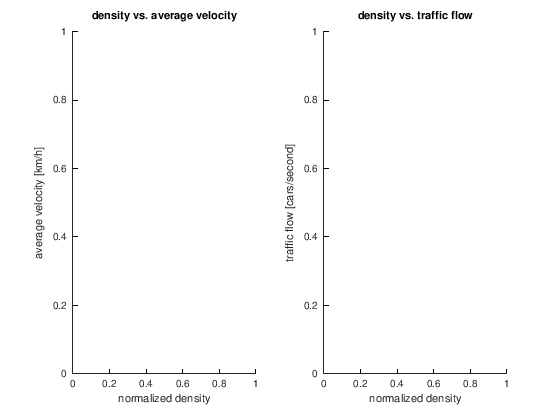

In [8]:
%% input parameters
max_speed   = 5;      % the maximally posible speed [cells/second]
p_SF        = 0.20;   % the ratio of 'sunday drivers'

    %<<<<<< ADD YOUR CODE HERE >>>>>>%
    
%% main loop
%1.) iterate through normalized densities

%for    
        %<<<<<< ADD YOUR CODE HERE >>>>>>%

    %2.) call function "trafficflow" and store outputs
        
        %<<<<<< ADD YOUR CODE HERE >>>>>>%
%end

figure(2)
subplot(1,2,1);

%3.) plot density vs. maximal velocity

    %<<<<<< ADD YOUR CODE HERE >>>>>>%
    
title('density vs. average velocity');
xlabel('normalized density')
ylabel('average velocity [km/h]')

subplot(1,2,2); 

%4.) plot density vs. traffic flow
    
    %<<<<<< ADD YOUR CODE HERE >>>>>>%
    
title('density vs. traffic flow');
xlabel('normalized density')
ylabel('traffic flow [cars/second]')

## Aufgabe 3
Experimentieren Sie mit den Parametern $v_{\text{max}}$ und $p_{\text{SF}}$. Wie lässt sich der Einfluss beider Parameter auf die Durchschnittsgeschwindigkeit und den Verkehrsfluss qualitativ beschreiben? Nennen sie eine Möglichkeit den Realismus des Modells zu steigen.

In [9]:
%% Qualitative Beschreibung des Einflusses von v_max auf v_mean und Q:

%% Qualitative Beschreibung des Einflusses von p_SF auf v_mean und Q:

%% Steigerung des Realismus durch:


## Literatur

 - Nagel, K. (1992). [A cellular automaton model for freeway traffic](https://pdfs.semanticscholar.org/17a6/135c5b7af91238989514f4c709c8146031d5.pdf); *Journal de Physique I, EDP Sciences, 2(12), 2221-2229.*